![tinhatben](tinhatben_svg.png)

# Neural Networks & Backpropagation: Part One

This Jupyter notebook has been written to partner with the
[tinhatben.com](https://tinhatben.com) article on : [Neural Networks & Backpropagation: Part One](https://tinhatben.com/2016/09/27/neural-networks-and-backpropagation-part-one/)

For more information on data science and machine learning go to
[tinhatben.com](https://www.tinhatben.com)

This jupyter notebook is licensed under the Mozilla Public License 2.0 if a copy of the license was not provided with this notebook it can be downloaded [here](https://www.mozilla.org/en-US/MPL/2.0/)

THIS NOTEBOOK IS PROVIDED UNDER THIS LICENSE ON AN “AS IS” BASIS, WITHOUT WARRANTY OF ANY KIND, EITHER EXPRESSED, IMPLIED, OR STATUTORY, INCLUDING, WITHOUT LIMITATION, WARRANTIES THAT THE COVERED SOFTWARE IS FREE OF DEFECTS, MERCHANTABLE, FIT FOR A PARTICULAR PURPOSE OR NON-INFRINGING

In [1]:
# Imports
from tinhatbenbranding import TINHATBEN_GRAY, TINHATBEN_YELLOW, add_tinhatbendotcom
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

In [2]:
def prettyprintarray(array, format="%d"):
    rows, cols = array.shape
    msg = "Shape: %i x %i\n" % (rows, cols)
    for row in range(rows):
        for col in range(cols):
            msg += format % (array[row, col])
            msg += "\t"
        msg += "\n"
    
    print(msg)

## Part One: Forward Propagation
As per the corresponding article we will be using a neural network to represent the common OR gate, used in computer science and electrical engineering.  Given the following inputs, we expect the outputs of our neural network to be:

| Input 1 | Input 2 | Output | 
|---------|:--------|:-------|
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

We will be constructing a neural network with the following topology and intial weights values.

<img src="net_all.png">

## Training Data
Dividing the training data into inputs and targets where x_train represents the inputs and y_train represents the target outputs

In [3]:
# Training data
x_train = np.array([
        [0, 0],
        [1, 0],   
        [0, 1],
        [1, 1],
    ])
y_train = np.array([
        [0],
        [1],
        [1],
    ])

In [4]:
print("x training data")
prettyprintarray(x_train)
print("y training data")
prettyprintarray(y_train)

x training data
Shape: 4 x 2
0	0	
1	0	
0	1	
1	1	

y training data
Shape: 3 x 1
0	
1	
1	



## Sigmoid Function
This is the linearity function to be used for the hidden and output layers in the network

$$g(z) = \frac{1}{1 + e^{-z}}$$

In [5]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

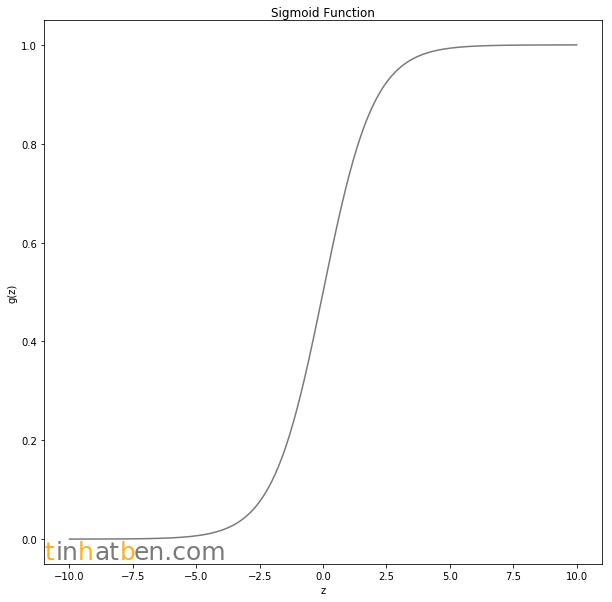

In [6]:
# Plot the sigmoid function
z = np.linspace(-10, 10, num=1000)

f = plt.figure()
ax = f.add_subplot(111)
ax.set_title("Sigmoid Function")
ax.set_xlabel("z")
ax.set_ylabel("g(z)")
ax.plot(z, sigmoid(z), color=TINHATBEN_GRAY)
add_tinhatbendotcom(ax, (0,0))
plt.savefig("sigmoid.png", dpi=300)

## Initialising Weights
Normally we want to initialise weights randomly, close to zero.  The reasons for initialising these values randomly about zero are covered in more detail in the article [Neural Networks & Backpropagation: Part One](https://tinhatben.com/2016/09/27/neural-networks-and-backpropagation-part-one/); for the purpose of this understanding the training process, we will specify the weights so we can follow the calculations manually

In [7]:
# Layer 1 weights
w1 = 0.1
w2 = 0.2
w3 = 0.3
w4 = 0.4
b1 = 0.5
b2 = 0.5

# Layer 2 weights
w5 = 0.01
w6 = 0.02
b3 = 0.03

## Forward Propagation
Given the weights and inputs we can now compute the activations for each of the nodes in the network.  So referring back to the article, the inputs to the hidden nodes and output layers can be calculated as follows:

$h_1 = b_1 + i_1w_1 + i_2w_3$

$h_2 = b_2 + i_1w_2 + i_2w_4$



In [8]:
# Using the second training example [1, 0]
i1 = 1
i2 = 0

h1 = b1 + i1 * w1 + i2 * w3
h2 = b2 + i1 * w2 + i2 * w4
ho = b3 + h1 * w5 + h2 * w6

print("h_1 = %0.2f" % h1)
print("h_2 = %0.2f" % h2)
print("h_o = %0.2f" % ho)

h_1 = 0.60
h_2 = 0.70
h_o = 0.05


If we compute the forward propagation as such individually we need to loop through each of the training samples and execute the above calculations.  We can compute the inputs to each of the nodes using all of the training samples in one step using linear algebra and matrices.  In order to do this we need to represent the weights as a matrix and add at bias unit (1) to the input samples to represent the **+1** connected to the bias weights $b_1, b_2, b_3$.  So configuring the weights as a matrix: we have 6 individual weight values, 3 input values per sample and in the hidden layer we want to calculate 2 input values.  So our hidden layer weights matrix should be a 3 x 2 matrix.

In [9]:
# Representing the weights as a matrix
Weights_1 = np.array([
        [b1, b2],        
        [w1, w2],
        [w3, w4],
    ])

print("Layer 1 Weights: (Input to Hidden Layer)")
prettyprintarray(Weights_1, format="%0.2f")

Layer 1 Weights: (Input to Hidden Layer)
Shape: 3 x 2
0.50	0.50	
0.10	0.20	
0.30	0.40	



For the hidden layer to output layer weights, we have 3 inputs from the hidden layer (including **+1** from the bias unit) and 1 output node.  So we want a 3 x 1 weights matrix.

In [10]:
Weights_2 = np.array([
        [b3],
        [w5],
        [w6],
    ])

print("Layer 2 Weights: (Hidden to Output Layer)")
prettyprintarray(Weights_2, format="%0.2f")

# Store the weights in a list for later use
Weights = [Weights_1, Weights_2]

Layer 2 Weights: (Hidden to Output Layer)
Shape: 3 x 1
0.03	
0.01	
0.02	



Adding the bias units **+1** to the inputs:

In [11]:
I = np.array([
        [1, 0, 0],
        [1, 1, 0],   
        [1, 0, 1],
        [1, 1, 1],
    ])
print("Inputs Array")
prettyprintarray(I)

Inputs Array
Shape: 4 x 3
1	0	0	
1	1	0	
1	0	1	
1	1	1	



Now we can calculate the hidden layer input values for ALL the training examples by $\vec{h_1} = \vec{I}\vec{W_1}$

In [12]:
h_1 = np.dot(I, Weights_1)
print("Hidden layer inputs")
prettyprintarray(h_1, format="%0.2f")

Hidden layer inputs
Shape: 4 x 2
0.50	0.50	
0.60	0.70	
0.80	0.90	
0.90	1.10	



Now computing the activation values for the hidden layers $\vec{a} = g(\vec{h_1}) = sigmoid(\vec{h_1})$

In [13]:
a_1 = sigmoid(h_1)
print("Hidden layer activation")
prettyprintarray(a_1, format="%0.2f")

Hidden layer activation
Shape: 4 x 2
0.62	0.62	
0.65	0.67	
0.69	0.71	
0.71	0.75	



Now we have the activations for the hidden layer, we can compute the outputs of the network.  Again we can do this for each training example individually.

$h_o = b_3 + a_1w_5 + a_2w_6$

Where

$a_1 = g(h_1) = sigmoid(h_1)$

$a_2 = g(h_2) = sigmoid(h_2)$

In [14]:
# Using the second training example [1, 0]
ho = b3 + sigmoid(h1) * w5 + sigmoid(h2) * w6

print("Output layer inputs for second training example")
print("ho = %0.2f" % ho)

Output layer inputs for second training example
ho = 0.05


$a_o = g(h_o) = sigmoid(h_o)$

In [15]:
ao = sigmoid(ho)
print("Output of network for second training example")
print("ao = %0.3f" % ao)

Output of network for second training example
ao = 0.512


Again, we can use linear algebra and matrices to compute the output layer inputs and activations for all training examples in one step.

In [16]:
a_1 = np.hstack((np.ones((a_1.shape[0], 1)), a_1))
print("Hidden layer activations with bias")
prettyprintarray(a_1, format="%0.2f")

Hidden layer activations with bias
Shape: 4 x 3
1.00	0.62	0.62	
1.00	0.65	0.67	
1.00	0.69	0.71	
1.00	0.71	0.75	



Computing the output values for the network for ALL the training examples: $\vec{h_o} = \vec{a_1}\vec{W_2}$ and
$\vec{a_o} = g(\vec{h_o}) = sigmoid(\vec{h_o})$

In [17]:
h_o = np.dot(a_1, Weights_2)
a_o = sigmoid(h_o)
print("Network output")
prettyprintarray(a_o, format="%0.3f")

Network output
Shape: 4 x 1
0.512	
0.512	
0.513	
0.513	



We have now completed the first pass of forward propagation and are ready for **Part Two: Backpropagation**

In [18]:
## End of notebook